In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [3]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.7
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

# PCA implement

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
pcaTrain = PCA(n_components=20).fit(X)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

PCA(n_components=20)
<class 'numpy.ndarray'>
19229
[[ 9.61016675e-01 -5.53028181e-01  7.99456335e-01 ...  2.77014513e-02
   1.27470509e-02  3.80537882e-03]
 [-7.39150886e-01 -3.37453009e-01  1.88247114e-01 ...  3.45730470e-02
   3.89505863e-02 -1.06354547e-01]
 [ 9.63277065e-01 -4.09564883e-01  1.29226987e-01 ... -4.10219427e-03
   2.76478407e-02 -2.78378064e-03]
 ...
 [ 9.63795918e-01 -4.25889615e-01  1.38504229e-01 ... -3.10471667e-03
   1.57032212e-02 -8.96998101e-03]
 [-5.97270714e-01 -4.08650571e-01  5.50203933e-02 ... -1.61619418e-01
   9.38971402e-02 -5.17081292e-02]
 [-6.95180348e-01 -3.99704434e-01  1.90847003e-01 ...  3.30389210e-02
   7.03383496e-02 -4.29812193e-04]]


In [6]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

13472


In [7]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
13472
[[ 9.61016675e-01 -5.53028181e-01  7.99456335e-01 ...  2.77014513e-02
   1.27470509e-02  3.80537882e-03]
 [-7.39150886e-01 -3.37453009e-01  1.88247114e-01 ...  3.45730470e-02
   3.89505863e-02 -1.06354547e-01]
 [ 9.63277065e-01 -4.09564883e-01  1.29226987e-01 ... -4.10219427e-03
   2.76478407e-02 -2.78378064e-03]
 ...
 [ 9.46154988e-01 -5.45809122e-01  8.10396534e-01 ...  2.20557491e-02
  -1.34947110e-02 -1.74572692e-02]
 [-5.97270714e-01 -4.08650571e-01  5.50203933e-02 ... -1.61619418e-01
   9.38971402e-02 -5.17081292e-02]
 [-6.95180348e-01 -3.99704434e-01  1.90847003e-01 ...  3.30389210e-02
   7.03383496e-02 -4.29812193e-04]]
<class 'numpy.ndarray'>
5757
[[-0.69238102 -0.37243265  0.02632897 ...  0.03927924  0.09359955
  -0.00812419]
 [-0.02564402  1.1449305   0.56713323 ... -0.09472311 -0.14599396
   0.01487168]
 [-0.75617797 -0.35712796  0.25603873 ... -0.03648649 -0.03142175
  -0.06498909]
 ...
 [-0.6719775  -0.38454102  0.01068868 ... -0.03861459  0.

# MLP implement

In [10]:
# train the model with random parameter
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier(

    solver="adam",
    hidden_layer_sizes=370,
    learning_rate='adaptive',
    random_state=3,
    max_iter=964,
    activation='relu',
    batch_size=17

     
     
     
        
     )



In [12]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)
train_MLP = np.array(compressed_dataset_X_train)
target_train_MLP= np.array(y_train)

test_MLP = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_MLP = np.zeros((len(test_MLP)))
oof_preds_MLP = np.zeros((len(train_MLP)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_MLP[train_index], train_MLP[val_index]
    train_y, valid_y = target_train_MLP[train_index], target_train_MLP[val_index]
    # ada_params = study_MLP.best_trial.params
    # model_MLP_2 = MLPClassifier(**ada_params,tol=.00001,early_stopping=True) # for early_stopping
    model_MLP.fit(train_X, train_y)
    # for train accuracy
    preds = model_MLP.predict(valid_X)
    oof_preds_MLP[val_index] = preds
    # for test accuracy
    preds = model_MLP.predict(test_MLP)
    test_preds_MLP += (preds)/5
print(np.abs(oof_preds_MLP-target_train_MLP).mean())

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [13:24<00:00, 160.93s/it]

0.46540973871733965


In [13]:
target_test_MLP = np.array(y_test)

In [14]:
from sklearn.metrics import accuracy_score
valid_Acc_MLP=accuracy_score(target_train_MLP,oof_preds_MLP)
print(valid_Acc_MLP)

# another technique for calculate test accuracy
test_Acc_MLP=accuracy_score(target_test_MLP,test_preds_MLP.round())
print(test_Acc_MLP)

0.7725653206650831
0.7264200104220948


In [15]:
train_Acc_MLP=model_MLP.score(compressed_dataset_X_train,y_train)
print(train_Acc_MLP)

0.8209619952494062


In [16]:
test_Acc_MLP=model_MLP.score(compressed_dataset_X_test,y_test)
print(test_Acc_MLP)

0.7745353482716693


In [18]:
len(y_test)

5757

# Evaluation

**confusion-matrix**

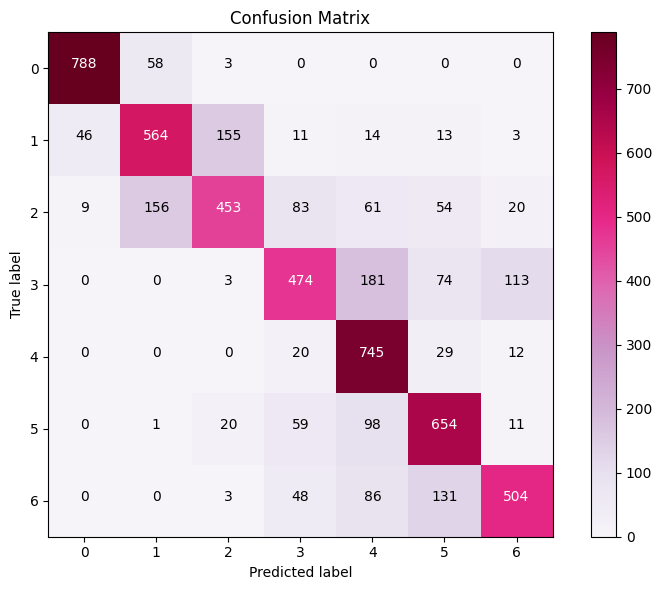

In [17]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_MLP.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


**train-loss**

In [ ]:
# find the losses at each iteration
# train_losses=classifier.fit(compressedDataframeTrain, y_train).loss_curve_
train_losses=tunned_model.loss_curve_

In [ ]:
print(train_losses)
print(len(train_losses)) #384= converge at iteration 276 from max_iter 571


[1.018139743537125, 0.8398871491080491, 0.8004493668712055, 0.7699043716983041, 0.74373603839393, 0.7223123896814918, 0.7034758544257165, 0.6875908901532551, 0.6730110081992331, 0.6597644072340302, 0.6498510837060442, 0.6396747504982417, 0.6307251920120416, 0.621461270171723, 0.6130047117292743, 0.606765568488888, 0.6000990003211314, 0.5941293542425539, 0.586832667412677, 0.5799253685119561, 0.5758682631351955, 0.5703895671840727, 0.5654980496494396, 0.5602678580860742, 0.5549991189588401, 0.5508883969698828, 0.5440615147619842, 0.5415185215222991, 0.5369356630632617, 0.5326530738396661, 0.5293006639903006, 0.5249154599920377, 0.5205289113202317, 0.5176135720909906, 0.5147527427496812, 0.5116111498297335, 0.5069445391199633, 0.5026096372064954, 0.5015295502971607, 0.4965197035024674, 0.4928550295216376, 0.4887826864287143, 0.4866336596561266, 0.4854697070747538, 0.48181460233968854, 0.4798024830495578, 0.47592543129886633, 0.4738788513457339, 0.47091748945397016, 0.4695801956636619, 0.

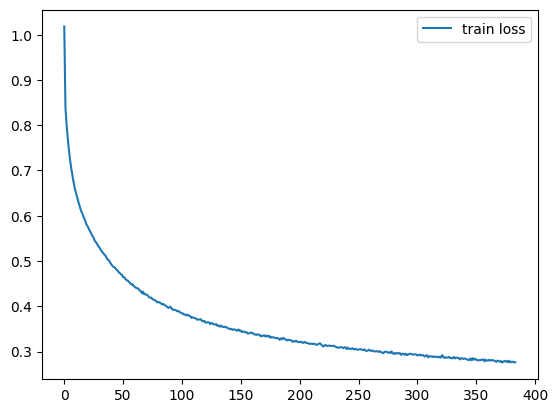

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)), train_losses, label="train loss")

plt.legend()


**validation graph**

**Learning_curve********

In [ ]:

compressed_dataset_X.shape

(19229, 30)

In [ ]:
y.shape

(19229,)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
################# it will take 0.8 as train data from the whole by-default ################
mlp = MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',random_state=5,max_iter=1000) #tuned MLP
train_sizes, train_scores, test_scores = learning_curve(mlp, compressed_dataset_X, y, train_sizes=np.linspace(0.1, 1.0, 5))

In [ ]:
train_sizes

array([ 1538,  4999,  8460, 11921, 15383])

In [ ]:
train_scores # by-default 5-fold cross validation

array([[0.99024707, 0.98114434, 0.98114434, 0.98114434, 0.98114434],
       [0.95639128, 0.93438688, 0.94238848, 0.94238848, 0.94238848],
       [0.92174941, 0.90425532, 0.90484634, 0.92080378, 0.92080378],
       [0.91066186, 0.90202164, 0.90621592, 0.92072813, 0.91544334],
       [0.89221868, 0.89462394, 0.90561009, 0.89676916, 0.91302087]])

In [ ]:
test_scores

array([[0.67524701, 0.68720749, 0.68720749, 0.67160686, 0.67906372],
       [0.77769111, 0.7698908 , 0.76729069, 0.76859074, 0.76644993],
       [0.80655226, 0.79875195, 0.79303172, 0.79979199, 0.79141743],
       [0.8174727 , 0.81877275, 0.81929277, 0.8200728 , 0.82158648],
       [0.825013  , 0.8276131 , 0.83619345, 0.82371295, 0.8319896 ]])

In [ ]:
#***** Calculate mean and standard deviation of train and test scores (as we got values for 5 fold cross in each row****)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
train_mean

array([0.98296489, 0.94358872, 0.91449173, 0.91101418, 0.90044855])

In [ ]:
train_std

array([0.00364109, 0.00711198, 0.0081262 , 0.0066029 , 0.00774467])

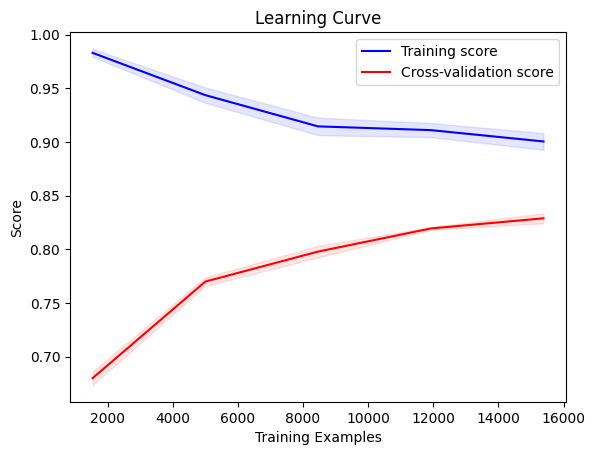

In [ ]:
# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1) #alpha=0.1: The transparency of the shaded region.
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

**ROC_curve*******

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Binarize the output
y_train = label_binarize(y_train,classes=[0,1,2,3,4,5,6])
n_classes = y_train.shape[1]
print(n_classes)
print(y_train[0])

7
[0 0 1 0 0 0 0]


In [ ]:
# Binarize the output (y_test)
y_test = label_binarize(y_test,classes=[0,1,2,3,4,5,6])
n_classes = y_test.shape[1]
print(n_classes)
print(y_test[0])

7
[1 0 0 0 0 0 0]


In [ ]:
# Learn to predict each class against the other
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',random_state=5,max_iter=500) #tuned MLP
classifier = OneVsRestClassifier(clf)

# Train the classifier
classifier.fit(compressed_dataset_X_train, y_train)

OneVsRestClassifier(estimator=MLPClassifier(batch_size=11,
                                            hidden_layer_sizes=212,
                                            learning_rate='adaptive',
                                            max_iter=500, random_state=5))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict() #dictionary
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.predict_proba(compressed_dataset_X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

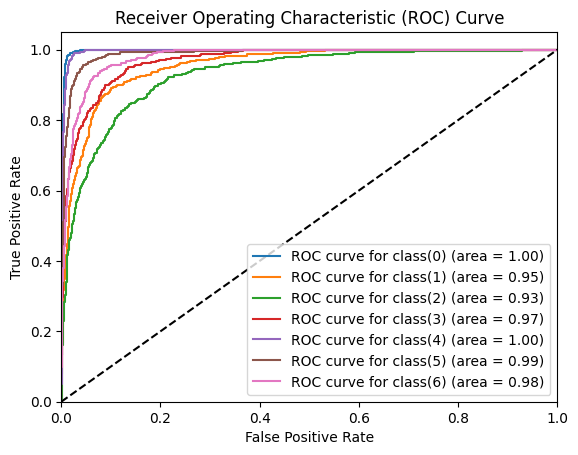

In [ ]:
# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class(%i) (area = %0.2f)' % (i,roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()

# MLP with validation and early stopping

In [ ]:
from sklearn.neural_network import MLPClassifier



model=MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',
              max_iter=571, random_state=5,early_stopping=True,tol=0.0001,n_iter_no_change=10) #tuned MLP
print(model)


train_acc = model.fit(compressed_dataset_X_train, y_train).score(compressed_dataset_X_train, y_train)

test_acc=model.score(compressed_dataset_X_test,y_test)


print('train accuracy: {} \t test accuracy: {}'.format(train_acc,test_acc))



MLPClassifier(batch_size=11, early_stopping=True, hidden_layer_sizes=212,
              learning_rate='adaptive', max_iter=571, random_state=5)
train accuracy: 0.8461086828886425 	 test accuracy: 0.8105128205128205


In [ ]:
train_losses_ES=model.loss_curve_
print(len(train_losses_ES)) # converse at 329 but trining stop at 68th iteration as the validation loss increases

67


In [ ]:
validation_score_ES=model.validation_scores_
print(len(validation_score_ES))

67


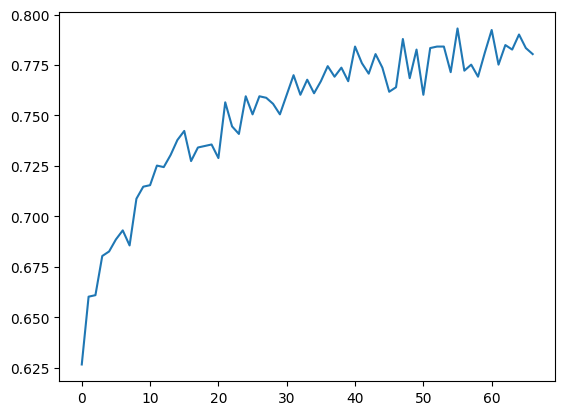

In [ ]:
plt.plot(range(len(validation_score_ES)), validation_score_ES, label="validation acc")

# with pre-tuned MLP

In [ ]:
# import torch
# from NecessaryModules.convert2Tensor import convert2Tensor
# from sklearn.neural_network import MLPClassifier

# # classifier =pickle.load(open("Classifier/MLP_model.pkl", "rb"))
# classifier=MLPClassifier(activation='tanh', batch_size=18, hidden_layer_sizes=158,
#               learning_rate='adaptive', max_iter=910, random_state=3,
#               solver='lbfgs')
# print(classifier)

# epoch=20
# train_A=[]
# valid_A=[]



# for i in (1,epoch):
#     train_acc = classifier.fit(compressedDataframeTrain, y_train).score(compressedDataframeTrain, y_train)
#     valid_acc=classifier.score(compressedDataframeValid,y_val)
    
#     train_A.append(train_acc)
#     valid_A.append(valid_acc)
#     # test_acc=classifier.fit(compressedDataframeTest, y_train).score(compressedDataframeTest,y_test)
#     # test_A.append(test_acc)

# # print('train accuracy: {} '.format(np.max(train_A)))
# print(train_A)
# print(valid_A)



In [ ]:
# test_A=[]
# for i in (1,epoch):
#     test_acc=classifier.score(compressedDataframeTest,y_test)
#     test_A.append(test_acc)
# #
# print('test accuracy: {} '.format(np.max(test_A)))